# Exploring some data from the Dataset

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [2]:
! pip install pytorch-lightning
! pip install facenet_pytorch

from src.modules.lfw_lightning_data_module import LfwImagesPairsDataset, LFW_DataModule
from src.tools.dataset_tools import get_dataset_filename_map, dataset_download_targz, get_pairs

dataset_download_targz()
image_map = get_dataset_filename_map(min_val=1)
pairs_map = get_pairs()
train_dataset = LfwImagesPairsDataset(image_map,pairs_map["train"])
val_dataset = LfwImagesPairsDataset(image_map,pairs_map["valid"])
test_dataset = LfwImagesPairsDataset(image_map,pairs_map["test"])
print("Number of train batches", len(train_dataset))
print("Number of valid batches", len(val_dataset))
print("Number of test batches", len(test_dataset))

     |████████████████████████████████| 675kB 12.2MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 276kB 51.4MB/s 
     |████████████████████████████████| 829kB 49.7MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=ef5d2d7118b8c3b62d249811689abda6c40c83d224dcddd8cfdf4b989515b200
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=1a89d3a65dc82d6631a8887115814423c9d695fd95221f9f5d787dcc382540c9
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built PyYAML future
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uni

Downloading...
From: http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz
To: /content/lfw-deepfunneled.tgz
100%|██████████| 109M/109M [00:01<00:00, 83.2MB/s]
Downloading...
From: http://vis-www.cs.umass.edu/lfw/pairsDevTrain.txt
To: /content/data/dataset/lfw-deepfunneled/train_pair.txt
100%|██████████| 56.6k/56.6k [00:00<00:00, 1.76MB/s]
Downloading...
From: http://vis-www.cs.umass.edu/lfw/pairsDevTest.txt
To: /content/data/dataset/lfw-deepfunneled/valid_pair.txt
100%|██████████| 26.0k/26.0k [00:00<00:00, 1.74MB/s]

downloading training pairs
downloading test pairs 
splitting test pairs into validation and test pairs


Number of train batches 2200
Number of valid batches 500
Number of test batches 500


In [3]:
#some of element in image map

c = 0
for key in image_map:
    print(key)
    print(image_map[key],"\n")
    c += 1
    if c==5:
        break
c=0    
for line in pairs_map["valid"]:
    print(line)
    c += 1
    if c==5:
        break

Flavia_Delaroli
['./data/dataset/lfw-deepfunneled/Flavia_Delaroli/Flavia_Delaroli_0002.jpg', './data/dataset/lfw-deepfunneled/Flavia_Delaroli/Flavia_Delaroli_0001.jpg'] 

John_Cusack
['./data/dataset/lfw-deepfunneled/John_Cusack/John_Cusack_0001.jpg', './data/dataset/lfw-deepfunneled/John_Cusack/John_Cusack_0002.jpg'] 

Bob_Holden
['./data/dataset/lfw-deepfunneled/Bob_Holden/Bob_Holden_0001.jpg'] 

Lewis_Booth
['./data/dataset/lfw-deepfunneled/Lewis_Booth/Lewis_Booth_0001.jpg'] 

Darren_Campel
['./data/dataset/lfw-deepfunneled/Darren_Campel/Darren_Campel_0001.jpg'] 

['Alexandra_Rozovskaya', '1', 'Don_King', '1\n']
['Carson_Daly', '1', '2\n']
['John_Garamendi', '1', '2\n']
['Gwendal_Peizerat', '1', '2\n']
['Gunilla_Backman', '1', 'Jennifer_Granholm', '1\n']


 Train dataset ----------------------------

 
 



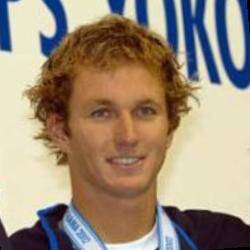

image1


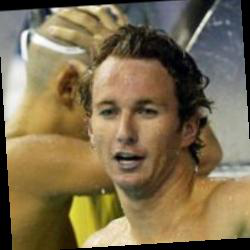

image2
They are the same person?  0.0

 
 



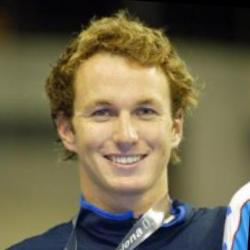

image1


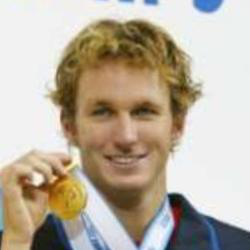

image2
They are the same person?  0.0

 
 



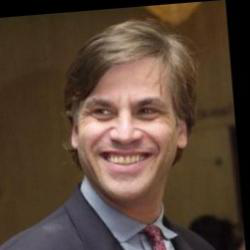

image1


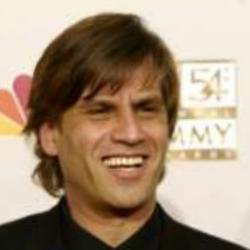

image2
They are the same person?  0.0

 Validation dataset ----------------------------

 
 



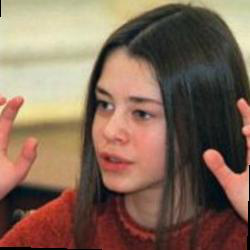

image1


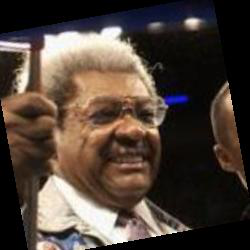

image2
They are the same person?  1.0

 
 



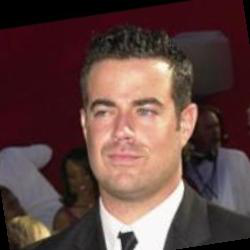

image1


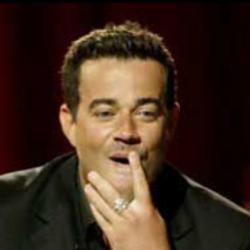

image2
They are the same person?  0.0

 
 



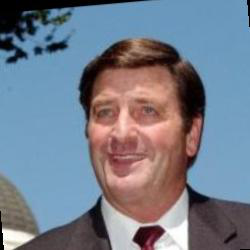

image1


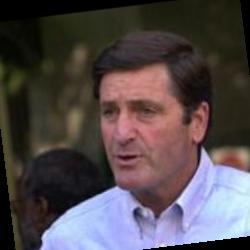

image2
They are the same person?  0.0

 Test dataset ----------------------------

 
 



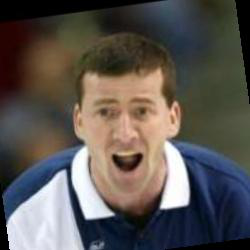

image1


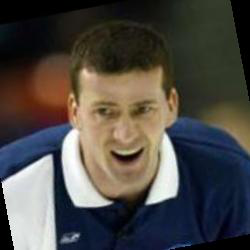

image2
They are the same person?  0.0

 
 



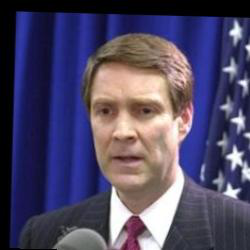

image1


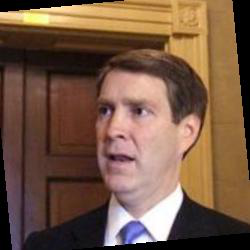

image2
They are the same person?  0.0

 
 



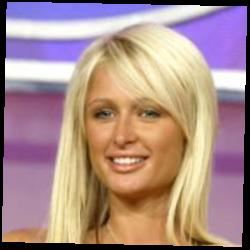

image1


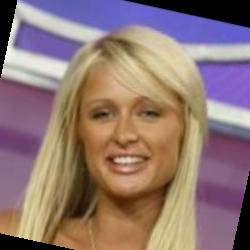

image2
They are the same person?  0.0


In [4]:
#some images

from PIL import Image
import numpy as np

c=0
#image from train dataset
print(" Train dataset ----------------------------")
for image1,image2,label in train_dataset:
    print("\n \n \n")
    display(image1)
    print("image1")
    display(image2)
    print("image2")
    print("They are the same person? ",label)
    c+=1
    if c==3:
        break

#image from validation dataset
c=0
print("\n Validation dataset ----------------------------")
for image1,image2,label in val_dataset:
    print("\n \n \n")
    display(image1)
    print("image1")
    display(image2)
    print("image2")
    print("They are the same person? ",label)
    c+=1
    if c==3:
        break
        
#image from test dataset
c=0
print("\n Test dataset ----------------------------")
for image1,image2,label in test_dataset:
    print("\n \n \n")
    display(image1)
    print("image1")
    display(image2)
    print("image2")
    print("They are the same person? ",label)
    c+=1
    if c==3:
        break

In [5]:
#some statistics
print("Number of subjects: ",len(image_map))
pic=0
for val in image_map.values():
    pic += len(val)
print("Total number of pictures: ",pic)
print("Avg pic for each subject: ", pic/len(image_map))

Number of subjects:  5749
Total number of pictures:  13233
Avg pic for each subject:  2.301791615933206


In [6]:
#DataLoader info
import multiprocessing as mp

dataloader = LFW_DataModule(
    train_dataset, 
    batch_size=32, 
    splitting_points=None, 
    num_workers=mp.cpu_count(), 
    manual_split=True, 
    valid_dataset=val_dataset, 
    test_dataset=test_dataset
)
dataloader.setup()
train_loader = dataloader.train_dataloader()
val_loader = dataloader.val_dataloader()
test_loader = dataloader.test_dataloader()

print("Batch_size: ", train_loader.batch_size)
print("Sampler info: ", train_loader.sampler)
print("Train loader length: ",len(train_loader))
print("Validation loader length: ",len(val_loader))
print("Test loader length: ",len(test_loader))

Batch_size:  32
Sampler info:  <torch.utils.data.sampler.RandomSampler object at 0x7f9b52868b38>
Train loader length:  69
Validation loader length:  16
Test loader length:  16


max value 1.0
min value 0.0
tensor([1., 1., 0., 0., 1.], dtype=torch.float64)


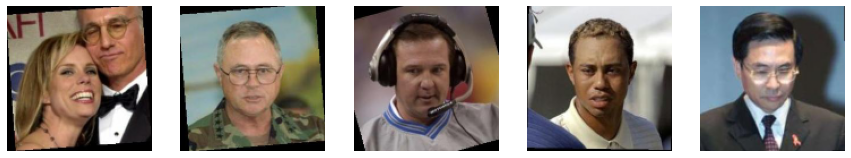

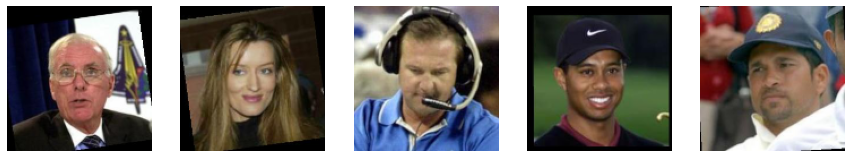

In [7]:
#Dataloader samples
from src.tools.visualization_tools import visualize_torch
import torch

for i, (im1, im2, label) in enumerate(train_loader):
    print('max value', torch.max(im1).item())
    print('min value', torch.min(im1).item())
    visualize_torch(im1[0:5])
    visualize_torch(im2[0:5])
    print(label[0:5])
    
    if i == 0:
        break

# Training the model

## Choosing the model

In [15]:
from src.model.CustomModel import Siamese, CNN_MODEL
import pytorch_lightning as pl
from src.tools.model_tools import ContrastiveLoss
from pytorch_lightning.loggers import TensorBoardLogger
from torch import nn
from torchsummary import summary

# cnn_model = CNN_MODEL.InceptionResnetV1
cnn_model = CNN_MODEL.MyCNN

if cnn_model == CNN_MODEL.MyCNN:
    model_hparams = {
        "loss_fn": ContrastiveLoss(),
        "lr": 0.001,
        "weight_decay":1e-5,
        "filter_channels": 4,
        "filter_size": 3,
        "dropout": 0.02,
        "n_hidden1": 4096,
        "n_hidden2": 2048,
        "n_hidden3": 128,
        'loss_margin': 5,
    }
    scheduler_params = None
    freeze_layers = False
    
if cnn_model == CNN_MODEL.InceptionResnetV1:
    model_hparams = {
        "loss_fn": nn.BCEWithLogitsLoss(),
        "lr": 0.001,
        "weight_decay":1e-5,
        "dropout": 0.02,
        "n_hidden1": 1024,
        "n_hidden2": 512,
#         "n_hidden3": 256,
        'loss_margin': 5,
    }
    
#     scheduler_params = {
#         "step_size": 10,
#         "gamma": 0.5,
#     }
    scheduler_params = None
    freeze_layers = True

model = Siamese(hparams=model_hparams, 
                cnn_model = cnn_model, 
                freeze_layers = freeze_layers, 
                scheduler_params = scheduler_params)
model.to('cuda')
print(summary(model,[ (3, model.input_size, model.input_size), (3, model.input_size, model.input_size)]))
model.cpu()

print("Model input size", model.input_size)

Layers to update
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 4, 256, 256]             112
         MaxPool2d-2          [-1, 4, 128, 128]               0
             PReLU-3          [-1, 4, 128, 128]               1
       BatchNorm2d-4          [-1, 4, 128, 128]               8
     ConvPoolPRelu-5          [-1, 4, 128, 128]               0
            Conv2d-6          [-1, 8, 128, 128]             296
         MaxPool2d-7            [-1, 8, 64, 64]               0
             PReLU-8            [-1, 8, 64, 64]               1
       BatchNorm2d-9            [-1, 8, 64, 64]              16
    ConvPoolPRelu-10            [-1, 8, 64, 64]               0
           Conv2d-11           [-1, 16, 64, 64]           1,168
        MaxPool2d-12           [-1, 16, 32, 32]               0
            PReLU-13           [-1, 16, 32, 32]               1
      BatchNorm2d-14  

## Hyperparameter Tuning

In [16]:
! pip install optuna

from src.model.CustomModel import Siamese, CNN_MODEL
import pytorch_lightning as pl
from src.tools.model_tools import ContrastiveLoss
from pytorch_lightning.loggers import TensorBoardLogger
from torch import nn
from torchsummary import summary
import optuna
from optuna.integration import PyTorchLightningPruningCallback

# cnn_model = CNN_MODEL.InceptionResnetV1
cnn_model = CNN_MODEL.MyCNN

def define_model( trial ):
  if cnn_model == CNN_MODEL.MyCNN:
      model_hparams = {
          "loss_fn": ContrastiveLoss(),
          "lr": trial.suggest_float( "lr", 1e-5, 1e-1, log=True),
          "weight_decay": trial.suggest_float( "weight_decay", 1e-6, 1e-4, log=True ),
          "filter_channels": 4,
          "filter_size": trial.suggest_int( "filter_size", 2, 5 ),
          "dropout": trial.suggest_float( "dropout", 0.001, 0.05 ),
          "n_hidden1": trial.suggest_int( "n_hidden1", 2048, 8192 ),
          "n_hidden2": 2048,
          "n_hidden3": 128,
          'loss_margin': trial.suggest_float( "loss_margin", 1, 10 ),
      }
      scheduler_params = None
      freeze_layers = False
      
  if cnn_model == CNN_MODEL.InceptionResnetV1:
      model_hparams = {
          "loss_fn": nn.BCEWithLogitsLoss(),
          "lr": trial.suggest_float( "lr", 1e-5, 1e-1, log=True ),
          "weight_decay":1e-5,
          "dropout": 0.02,
          "n_hidden1": 1024,
          "n_hidden2": 512,
  #         "n_hidden3": 256,
          'loss_margin': 5,
      }
      
  #     scheduler_params = {
  #         "step_size": 10,
  #         "gamma": 0.5,
  #     }
      scheduler_params = None
      freeze_layers = True

  model = Siamese(hparams=model_hparams, 
                  cnn_model = cnn_model, 
                  freeze_layers = freeze_layers, 
                  scheduler_params = scheduler_params)
  model.to('cuda')
  print(summary(model,[ (3, model.input_size, model.input_size), (3, model.input_size, model.input_size)]))
  model.cpu()

  print("Model input size", model.input_size)

  return model

In [17]:
from pytorch_lightning import Callback

class MetricsCallback(Callback):
    """PyTorch Lightning metric callback."""

    def __init__(self):
        super().__init__()
        self.metrics = []

    def on_validation_end(self, trainer, pl_module):
        self.metrics.append(trainer.callback_metrics)

In [19]:
def objective( trial ):
  exp_name = 'bce_test'

  early_stop_callback = pl.callbacks.EarlyStopping(
      monitor='val_loss',
      patience=5,
      strict=False,
      verbose=False,
      mode='min'
  )

  checkpoint_callback = pl.callbacks.ModelCheckpoint(
      monitor='val_loss',
      dirpath=f'data/checkpoint/{exp_name}',
      filename='Siamese-Cont-{epoch:02d}-{val_loss:.2f}',
      save_top_k=5,
      mode='min',
  )

  trainer_params = {
      "check_val_every_n_epoch": 1, 
      #"callbacks": [
         # early_stop_callback,
  #       #  checkpoint_callback,
      #],
      "fast_dev_run": False,
      "max_epochs": 5,
      "gpus":1 if torch.cuda.is_available() else None,
      
  }

  model = define_model( trial )

  # logname = 'resnet_BCE'
  logger = TensorBoardLogger('tb_logs', name=exp_name)
  metrics_callback = MetricsCallback()

  do_train = True

  trainer = pl.Trainer(**trainer_params, logger = False, checkpoint_callback = checkpoint_callback, callbacks = [metrics_callback, PyTorchLightningPruningCallback(trial, monitor="val_acc")] )
  if do_train:
      trainer.fit(model, dataloader)

  return metrics_callback.metrics[-1]["val_acc"].item()

In [20]:
study = optuna.create_study( direction="maximize" )
study.optimize( objective, n_trials=3, timeout=600 )

print( "Number of finished trials: {}".format( len(study.trials) ) )

print( "Best trial:" )
trial = study.best_trial

print( "  Value: {}".format( trial.value ) )

print( "  Params: " )
for key, value in trial.params.items():
  print( "    {}: {}".format( key, value ) )

[I 2020-12-31 15:12:25,284] A new study created in memory with name: no-name-d0254eef-7abf-4516-ac85-5c391e3687b2


Layers to update
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 4, 256, 256]             304
         MaxPool2d-2          [-1, 4, 128, 128]               0
             PReLU-3          [-1, 4, 128, 128]               1
       BatchNorm2d-4          [-1, 4, 128, 128]               8
     ConvPoolPRelu-5          [-1, 4, 128, 128]               0
            Conv2d-6          [-1, 8, 128, 128]             808
         MaxPool2d-7            [-1, 8, 64, 64]               0
             PReLU-8            [-1, 8, 64, 64]               1
       BatchNorm2d-9            [-1, 8, 64, 64]              16
    ConvPoolPRelu-10            [-1, 8, 64, 64]               0
           Conv2d-11           [-1, 16, 64, 64]           3,216
        MaxPool2d-12           [-1, 16, 32, 32]               0
            PReLU-13           [-1, 16, 32, 32]               1
      BatchNorm2d-14  

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning:

You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type            | Params
--------------------------------------------
0 | loss_fn | ContrastiveLoss | 0     
1 | conv    | myCNN           | 4.4 K 
2 | linear  | Sequential      | 115 M 
--------------------------------------------
115 M     Trainable params
0         Non-trainable params
115 M     Total params


Model input size 256


[I 2020-12-31 15:15:27,381] Trial 0 finished with value: 0.6801857352256775 and parameters: {'lr': 0.007114829035880553, 'weight_decay': 1.3587600976366668e-06, 'filter_size': 5, 'dropout': 0.03672070555254663, 'n_hidden1': 6233, 'loss_margin': 9.843451921156598}. Best is trial 0 with value: 0.6801857352256775.
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning:

Checkpoint directory data/checkpoint/bce_test exists and is not empty.



Layers to update
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 4, 256, 256]             304
         MaxPool2d-2          [-1, 4, 128, 128]               0
             PReLU-3          [-1, 4, 128, 128]               1
       BatchNorm2d-4          [-1, 4, 128, 128]               8
     ConvPoolPRelu-5          [-1, 4, 128, 128]               0
            Conv2d-6          [-1, 8, 128, 128]             808
         MaxPool2d-7            [-1, 8, 64, 64]               0
             PReLU-8            [-1, 8, 64, 64]               1
       BatchNorm2d-9            [-1, 8, 64, 64]              16
    ConvPoolPRelu-10            [-1, 8, 64, 64]               0
           Conv2d-11           [-1, 16, 64, 64]           3,216
        MaxPool2d-12           [-1, 16, 32, 32]               0
            PReLU-13           [-1, 16, 32, 32]               1
      BatchNorm2d-14  

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type            | Params
--------------------------------------------
0 | loss_fn | ContrastiveLoss | 0     
1 | conv    | myCNN           | 4.4 K 
2 | linear  | Sequential      | 108 M 
--------------------------------------------
108 M     Trainable params
0         Non-trainable params
108 M     Total params


Model input size 256


[I 2020-12-31 15:18:23,375] Trial 1 finished with value: 0.6804900765419006 and parameters: {'lr': 0.00022790685323588355, 'weight_decay': 4.266274082952663e-06, 'filter_size': 5, 'dropout': 0.027532898340618506, 'n_hidden1': 5861, 'loss_margin': 8.270834318719345}. Best is trial 1 with value: 0.6804900765419006.


Layers to update
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 4, 257, 257]              52
         MaxPool2d-2          [-1, 4, 128, 128]               0
             PReLU-3          [-1, 4, 128, 128]               1
       BatchNorm2d-4          [-1, 4, 128, 128]               8
     ConvPoolPRelu-5          [-1, 4, 128, 128]               0
            Conv2d-6          [-1, 8, 129, 129]             136
         MaxPool2d-7            [-1, 8, 64, 64]               0
             PReLU-8            [-1, 8, 64, 64]               1
       BatchNorm2d-9            [-1, 8, 64, 64]              16
    ConvPoolPRelu-10            [-1, 8, 64, 64]               0
           Conv2d-11           [-1, 16, 65, 65]             528
        MaxPool2d-12           [-1, 16, 32, 32]               0
            PReLU-13           [-1, 16, 32, 32]               1
      BatchNorm2d-14  

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type            | Params
--------------------------------------------
0 | loss_fn | ContrastiveLoss | 0     
1 | conv    | myCNN           | 775   
2 | linear  | Sequential      | 138 M 
--------------------------------------------
138 M     Trainable params
0         Non-trainable params
138 M     Total params


Model input size 256


[I 2020-12-31 15:22:15,957] Trial 2 finished with value: 0.6359695792198181 and parameters: {'lr': 0.0005353886247865978, 'weight_decay': 1.5139435373659965e-06, 'filter_size': 2, 'dropout': 0.04894105297181244, 'n_hidden1': 7486, 'loss_margin': 3.2492775539139975}. Best is trial 1 with value: 0.6804900765419006.


Number of finished trials: 3
Best trial:
  Value: 0.6804900765419006
  Params: 
    lr: 0.00022790685323588355
    weight_decay: 4.266274082952663e-06
    filter_size: 5
    dropout: 0.027532898340618506
    n_hidden1: 5861
    loss_margin: 8.270834318719345


## Defining the Dataloader

In [18]:
dataloader = LFW_DataModule(
    train_dataset, 
    batch_size=16, 
    splitting_points=None, 
    num_workers=mp.cpu_count(), 
    manual_split=True, 
    valid_dataset=val_dataset, 
    test_dataset=test_dataset,
    input_size=model.input_size
)
dataloader.setup()
train_loader = dataloader.train_dataloader()
val_loader = dataloader.val_dataloader()
test_loader = dataloader.test_dataloader()

In [ ]:
# %tensorboard --logdir tb_logs

## Train Custom Model

In [52]:
exp_name = 'bce_test'

early_stop_callback = pl.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    strict=False,
    verbose=False,
    mode='min'
)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_loss',
    dirpath=f'data/checkpoint/{exp_name}',
    filename='Siamese-Cont-{epoch:02d}-{val_loss:.2f}',
    save_top_k=5,
    mode='min',
)

trainer_params = {
    "check_val_every_n_epoch": 1, 
    "callbacks": [
        early_stop_callback,
#         checkpoint_callback,
    ],
    "fast_dev_run": False,
    "max_epochs": 100,
    "gpus":1 if torch.cuda.is_available() else None,
    
}

# logname = 'resnet_BCE'
logger = TensorBoardLogger('tb_logs', name=exp_name)

do_train = False

trainer = pl.Trainer(**trainer_params, logger = logger)
if do_train:
    trainer.fit(model, dataloader)

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning:

Checkpoint directory data/checkpoint/bce_test exists and is not empty.

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning:

You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


# Save/Load Checkpoint

## Manual Save

In [ ]:
import os

save_checkpoint = False
if save_checkpoint:
    save_dir = os.path.join('data', 'saved')  
    checkpoint_path = os.path.join(save_dir, 'Siamese-Contrastive-last.ckpt')
    trainer.save_checkpoint(checkpoint_path)

## Load Checkpoint
Download checkpoints from https://drive.google.com/drive/folders/1puXPrBrquphElXiCDuZSIbSYdRqprxG0?usp=sharing

In [ ]:
load_checkpoint = True

if load_checkpoint:
#     checkpoint_path = checkpoint_callback.best_model_path
    checkpoint_path = os.path.join('data', 'checkpoint', 'margin5', 'Siamese-Contrastive-epoch=25-val_loss=1.00.ckpt')
#     checkpoint_path = os.path.join(checkpoint_callback.dirpath, 'Siamese-BCE-epoch=19-val_loss=0.35.ckpt')

    
    model = model.load_from_checkpoint(checkpoint_path=checkpoint_path)
#     x1, x2, label, y = inference(chkpt_model, loader=dataloader.val_dataloader())
#     visualize_torch(x1[:5])
#     visualize_torch(x2[:5])
#     print("labels", label.squeeze()[:5])
#     print("predictions", y.squeeze()[:5])

Layers to update
	 conv.model.0.model.0.weight
	 conv.model.0.model.0.bias
	 conv.model.0.model.2.weight
	 conv.model.0.model.3.weight
	 conv.model.0.model.3.bias
	 conv.model.1.model.0.weight
	 conv.model.1.model.0.bias
	 conv.model.1.model.2.weight
	 conv.model.1.model.3.weight
	 conv.model.1.model.3.bias
	 conv.model.2.model.0.weight
	 conv.model.2.model.0.bias
	 conv.model.2.model.2.weight
	 conv.model.2.model.3.weight
	 conv.model.2.model.3.bias
	 linear.0.model.0.weight
	 linear.0.model.0.bias
	 linear.0.model.1.weight
	 linear.0.model.2.weight
	 linear.0.model.2.bias
	 linear.1.model.0.weight
	 linear.1.model.0.bias
	 linear.1.model.1.weight
	 linear.1.model.2.weight
	 linear.1.model.2.bias
	 linear.2.weight
	 linear.2.bias


## Retrain from checkpoint

In [ ]:
resume_training = False
if resume_training:
    checkpoint_path = checkpoint_callback.best_model_path
    trainer = pl.Trainer(**trainer_params, resume_from_checkpoint=checkpoint_path)
    trainer.fit(model)

# Evaluate Model

## Run validation epoch

In [ ]:
trainer.test(model, dataloader.val_dataloader())

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'avg_acc': tensor(0.4636), 'avg_loss': tensor(8.6785, dtype=torch.float64)}
--------------------------------------------------------------------------------



/home/kareem/PycharmProjects/whos_that_pokemon/venv/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The testing_epoch_end should not return anything as of 9.1.to log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


[{'avg_loss': 8.67848198478373, 'avg_acc': 0.46357038617134094}]

## Run test epoch

In [ ]:
trainer.test(model, dataloader.test_dataloader())

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'avg_acc': tensor(0.4455), 'avg_loss': tensor(8.5143, dtype=torch.float64)}
--------------------------------------------------------------------------------



[{'avg_loss': 8.514281457043353, 'avg_acc': 0.445472776889801}]

labels tensor([1., 1., 1., 1., 0.], dtype=torch.float64)
predictions tensor([2.4939, 1.7818, 0.7030, 1.9402, 1.2915])


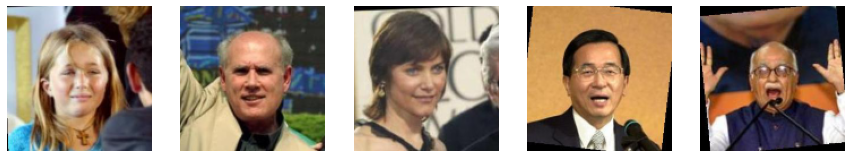

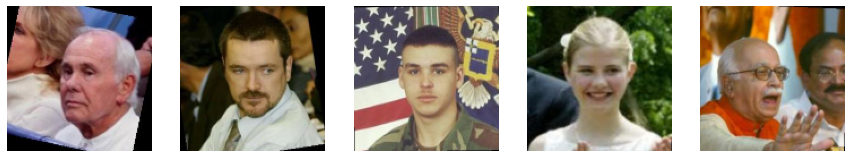

In [ ]:
from src.tools.model_tools import inference
from torch.utils import data


for x1, x2, label, y in inference(model, loader=dataloader.val_dataloader()):
    visualize_torch(x1[:5])
    visualize_torch(x2[:5])
    print("labels", label.squeeze()[:5])
    print("predictions", y.squeeze()[:5])
    break

labels tensor([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])
predic tensor([0.2362, 1.0635, 0.6285, 0.6720, 1.1251, 0.9396, 0.3531, 0.6816, 1.2737,
        1.2705])


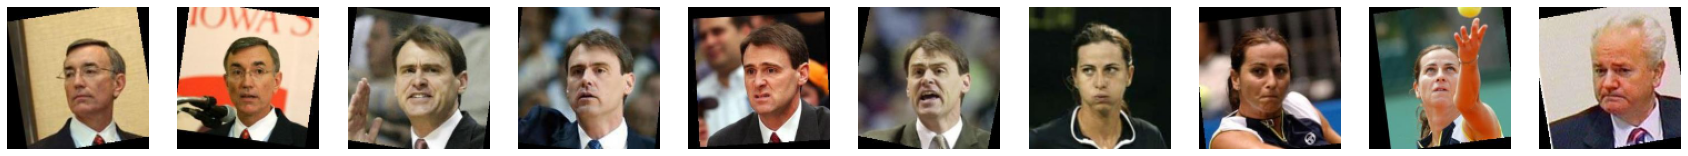

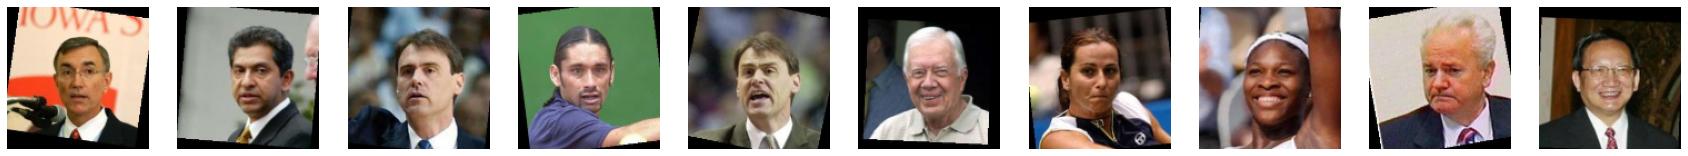

In [ ]:
from src.modules.lfw_lightning_data_module import LfwImagesDataset
from torchvision import transforms


transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((model.input_size, model.input_size))
        ])
image_map = get_dataset_filename_map()
dataset = LfwImagesDataset(image_map, transform = transform)


inputs=[]
for i, (image1,image2,label) in enumerate(dataset):
    inputs.append((image1,image2,label))
    if i==9:
        break
        
        
for x1, x2, label, y in inference(model, images=inputs):
    visualize_torch(x1[:10], n_cols=10, n_rows = 1)
    visualize_torch(x2[:10], n_cols=10, n_rows = 1)
    print("labels", label.squeeze()[:20])
    print("predic", y.squeeze()[:20])
    break

labels tensor([0., 1., 0., 1., 0.], dtype=torch.float64)
predictions tensor([0.3836, 1.7270, 0.5292, 1.5158, 0.3761])


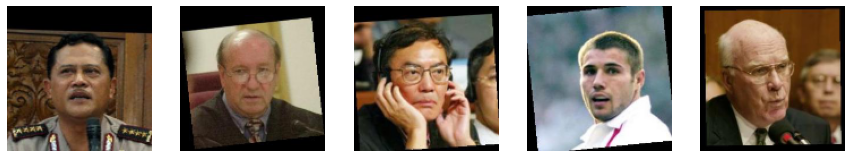

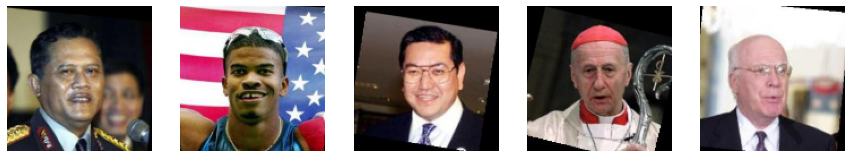

In [ ]:
from src.tools.model_tools import inference

imageslist = range(5,10)

for x1, x2, label, y in inference(model, loader=dataloader.test_dataloader()):
    visualize_torch(x1[imageslist])
    visualize_torch(x2[imageslist])
    print("labels", label.squeeze()[imageslist])
    print("predictions", y.squeeze()[imageslist])
    break

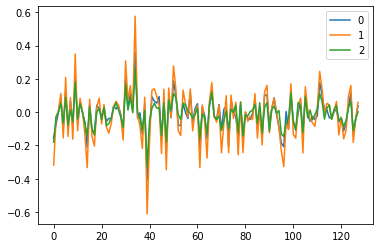

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = []
i = 0
for x1, x2, label, y in inference(model, loader=dataloader.test_dataloader()):
  if( label[i] == 0. ):
    data.append( np.asarray( model.forward_one( x1 )[i] ) )
    data.append( np.asarray( model.forward_one( x2 )[i] ) )
    for j in range (1, 2):
      data.append( np.asarray( model.forward_one( x1 )[i + j] ) )
    break
  i += 1

pd.DataFrame(data).T.plot()
plt.show()

In [ ]:
from src.modules.lfw_lightning_data_module import LfwImagesDataset
from torchvision import transforms
from src.tools.model_tools import inference_one

transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((model.input_size, model.input_size))
        ])
image_map = get_dataset_filename_map()
dataset = LfwImagesDataset(image_map, transform = transform)


inputs=[]
for i, (image1,image2,label) in enumerate(dataset):
    inputs.append((image1,label))
    if i==9:
        break
        
        
for x1, label, embedding in inference_one(model, images=inputs):
#     visualize_torch(x1[:10], n_cols=10, n_rows = 1)

    print("embedding", embedding.shape)
    break

embedding torch.Size([10, 128])
